Age: Duration since the opportunity was identified (days, weeks, months).
Technology Primary: Type of technology or cloud solution offered.
Joining Date: Date when the sales lead entered the potential customer relationship.
Joined Through Referral: Binary indicator ('Yes' or 'No') if the opportunity came from a referral.
Referral ID: Unique code for the referrer.
Preferred Offer Types: Types of promotional offers preferred by the prospect.
Last Visit Time: Timestamp of the most recent interaction with the company.
Days Since Last Login: Days elapsed since the last access to the company’s online system.
Avg Time Spent: Average time spent per interaction with the company's services.
Opportunity Size (USD): Estimated financial value of the sales opportunity.
Avg Frequency Login Days: Average interval between logins or engagements with the company's online systems.
Points in Wallet: Loyalty points accumulated by the prospect.
Used Special Discount: Indicator if the prospect used a special discount.
Offer Application Preference: Prospect's preferred method for receiving and utilizing offers.
Past Complaint: Indicator if the prospect has lodged a complaint before.
Complaint Status: Status of any submitted complaints.
Feedback: Feedback from the prospect.
Churn: Indicator if the prospect has or is at risk of discontinuing the business relationship.

In [1]:
import pandas as pd

# Load the churn dataset
file_path = '../data/churn.csv'
churn_data = pd.read_csv(file_path)

# Display basic information about the dataset
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           36992 non-null  int64  
 1   Technology Primary            36992 non-null  object 
 2   joining_date                  36992 non-null  object 
 3   joined_through_referral       36992 non-null  object 
 4   referral_id                   36992 non-null  object 
 5   preferred_offer_types         36704 non-null  object 
 6   last_visit_time               36992 non-null  object 
 7   days_since_last_login         36992 non-null  int64  
 8   avg_time_spent                36992 non-null  float64
 9   Opportunity Size (USD)        36992 non-null  float64
 10  avg_frequency_login_days      36992 non-null  object 
 11  points_in_wallet              33549 non-null  float64
 12  used_special_discount         36992 non-null  object 
 13  o

In [2]:
# Convert column names to lowercase and replace spaces with underscores
churn_data.columns = churn_data.columns.str.lower().str.replace(' ', '_')

churn_data.columns = churn_data.columns.str.lower().str.replace(r'[^a-zA-Z0-9_]', '_')

churn_data = churn_data.rename(columns={'opportunity_size_(usd)': 'opportunity_size_usd'})

churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           36992 non-null  int64  
 1   technology_primary            36992 non-null  object 
 2   joining_date                  36992 non-null  object 
 3   joined_through_referral       36992 non-null  object 
 4   referral_id                   36992 non-null  object 
 5   preferred_offer_types         36704 non-null  object 
 6   last_visit_time               36992 non-null  object 
 7   days_since_last_login         36992 non-null  int64  
 8   avg_time_spent                36992 non-null  float64
 9   opportunity_size_usd          36992 non-null  float64
 10  avg_frequency_login_days      36992 non-null  object 
 11  points_in_wallet              33549 non-null  float64
 12  used_special_discount         36992 non-null  object 
 13  o

In [3]:
# Check for missing values
missing_values = churn_data.isnull().sum()

# Summarize the statistical properties of numerical columns
numerical_summary = churn_data.describe()

# Explore the distribution of categorical variables
categorical_columns = churn_data.select_dtypes(include=['object']).columns
categorical_distribution = churn_data[categorical_columns].describe()

# Analyze the target variable `churn`
churn_distribution = churn_data['churn'].value_counts()

missing_values, numerical_summary, categorical_distribution, churn_distribution

(age                                0
 technology_primary                 0
 joining_date                       0
 joined_through_referral            0
 referral_id                        0
 preferred_offer_types            288
 last_visit_time                    0
 days_since_last_login              0
 avg_time_spent                     0
 opportunity_size_usd               0
 avg_frequency_login_days           0
 points_in_wallet                3443
 used_special_discount              0
 offer_application_preference       0
 past_complaint                     0
 complaint_status                   0
 feedback                           0
 churn                              0
 dtype: int64,
                 age  days_since_last_login  avg_time_spent   
 count  36992.000000           36992.000000    36992.000000  \
 mean      37.118161             -41.915576      243.472334   
 std       15.867412             228.819900      398.289149   
 min       10.000000            -999.000000    -2

In [4]:
# Dropping the 'joining_date' and 'referral_id' columns as they are not needed for analysis
churn_data_cleaned = churn_data.drop(['joining_date', 'referral_id'], axis=1)

# Display the first few rows of the modified dataset
churn_data_cleaned.head()


,age,technology_primary,joined_through_referral,preferred_offer_types,last_visit_time,days_since_last_login,avg_time_spent,opportunity_size_usd,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn
0,18,Analytics,No,Gift Vouchers/Coupons,16:08:02,17,300.63,53005.25,17,781.75,Yes,Yes,No,Not Applicable,Intuitive User Interface,0
1,32,ERP Implementation,?,Gift Vouchers/Coupons,12:38:13,16,306.34,12838.38,10,NaN,Yes,No,Yes,Solved,Proactive Issue Resolution,0
2,44,ERP Implementation,Yes,Gift Vouchers/Coupons,22:53:21,14,516.16,21027.00,22,500.69,No,Yes,Yes,Solved in Follow-up,Unhelpful Online Resources,1
3,37,ERP Implementation,Yes,Gift Vouchers/Coupons,15:57:50,11,53.27,25239.56,6,567.66,No,Yes,Yes,Unsolved,Unhelpful Online Resources,1
4,31,Technical Business Solutions,No,Credit/Debit Card Offers,15:46:44,20,113.13,24483.66,16,663.06,No,Yes,Yes,Solved,Unhelpful Online Resources,1


In [5]:
import numpy as np

# Handling missing data
# For categorical data, we'll replace missing values with the mode (most frequent value)
# For numerical data, we'll replace missing values with the median

# Identifying columns with missing values
missing_value_columns = churn_data_cleaned.columns[churn_data_cleaned.isnull().any()].tolist()

# Replace missing values
for col in missing_value_columns:
    if churn_data_cleaned[col].dtype == 'object':
        # Replace missing categorical data with mode
        churn_data_cleaned[col].fillna(churn_data_cleaned[col].mode()[0], inplace=True)
    else:
        # Replace missing numerical data with median
        churn_data_cleaned[col].fillna(churn_data_cleaned[col].median(), inplace=True)

# Data Transformation
# Converting 'Yes'/'No' responses to binary (1/0)
binary_columns = ['joined_through_referral', 'used_special_discount', 'offer_application_preference', 'past_complaint']

for col in binary_columns:
    churn_data_cleaned[col] = churn_data_cleaned[col].map({'Yes': 1, 'No': 0, '?': 0}) # Treating '?' as 'No'

# Statistical Summary
numerical_summary = churn_data_cleaned.describe(include=[np.number])
categorical_summary = churn_data_cleaned.describe(include=[object])  # Change np.object to object

numerical_summary, categorical_summary

(                age  joined_through_referral  days_since_last_login   
 count  36992.000000             36992.000000           36992.000000  \
 mean      37.118161                 0.424822             -41.915576   
 std       15.867412                 0.494323             228.819900   
 min       10.000000                 0.000000            -999.000000   
 25%       23.000000                 0.000000               8.000000   
 50%       37.000000                 0.000000              12.000000   
 75%       51.000000                 1.000000              16.000000   
 max       64.000000                 1.000000              26.000000   
 
        avg_time_spent  opportunity_size_usd  points_in_wallet   
 count    36992.000000          36992.000000      36992.000000  \
 mean       243.472334          29271.194003        687.881611   
 std        398.289149          19444.806226        184.838004   
 min      -2814.109110            800.460000       -760.660000   
 25%         60.1025

In [6]:
# Removing rows where 'avg_time_spent' has negative values
churn_data_cleaned = churn_data_cleaned[churn_data_cleaned['avg_time_spent'] >= 0]

# Display the first few rows of the modified dataset to confirm the changes
churn_data_cleaned.head()

,age,technology_primary,joined_through_referral,preferred_offer_types,last_visit_time,days_since_last_login,avg_time_spent,opportunity_size_usd,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn
0,18,Analytics,0,Gift Vouchers/Coupons,16:08:02,17,300.63,53005.25,17,781.75,1,1,0,Not Applicable,Intuitive User Interface,0
1,32,ERP Implementation,0,Gift Vouchers/Coupons,12:38:13,16,306.34,12838.38,10,697.62,1,0,1,Solved,Proactive Issue Resolution,0
2,44,ERP Implementation,1,Gift Vouchers/Coupons,22:53:21,14,516.16,21027.00,22,500.69,0,1,1,Solved in Follow-up,Unhelpful Online Resources,1
3,37,ERP Implementation,1,Gift Vouchers/Coupons,15:57:50,11,53.27,25239.56,6,567.66,0,1,1,Unsolved,Unhelpful Online Resources,1
4,31,Technical Business Solutions,0,Credit/Debit Card Offers,15:46:44,20,113.13,24483.66,16,663.06,0,1,1,Solved,Unhelpful Online Resources,1


In [7]:
# Counting the number of rows with unusual/negative values in 'Days Since Last Login' and 'Points in Wallet'

# Count of rows with unusual values in 'Days Since Last Login' (e.g., -999)
unusual_login_days_count = churn_data_cleaned[churn_data_cleaned['days_since_last_login'] < 0].shape[0]

# Count of rows with negative values in 'Points in Wallet'
negative_points_count = churn_data_cleaned[churn_data_cleaned['points_in_wallet'] < 0].shape[0]

unusual_login_days_count, negative_points_count

(1915, 124)

In [8]:
# Total number of rows in the dataset
total_rows = churn_data_cleaned.shape[0]
total_rows

35273

In [9]:
# Removing rows with unusual values in 'Days Since Last Login' and negative values in 'Points in Wallet'
churn_data_cleaned = churn_data_cleaned[churn_data_cleaned['days_since_last_login'] >= 0]
churn_data_cleaned = churn_data_cleaned[churn_data_cleaned['points_in_wallet'] >= 0]

# New count of total rows after removal
new_total_rows = churn_data_cleaned.shape[0]
new_total_rows

33242

In [10]:
# Convert 'last_visit_time' to datetime
churn_data_cleaned['last_visit_time'] = pd.to_datetime(churn_data_cleaned['last_visit_time'])

# Extract the hour component
churn_data_cleaned['last_visit_hour'] = churn_data_cleaned['last_visit_time'].dt.hour

# Displaying the first few rows to verify the transformation
transformed_last_visit_time = churn_data_cleaned[['last_visit_time', 'last_visit_hour']].head()

transformed_last_visit_time

C:\Users\asus\AppData\Local\Temp\ipykernel_71216\1017811466.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  churn_data_cleaned['last_visit_time'] = pd.to_datetime(churn_data_cleaned['last_visit_time'])


,last_visit_time,last_visit_hour
0,2024-01-18 16:08:02,16
1,2024-01-18 12:38:13,12
2,2024-01-18 22:53:21,22
3,2024-01-18 15:57:50,15
4,2024-01-18 15:46:44,15


In [11]:
from sklearn.preprocessing import LabelEncoder

# Step 2: Categorical Variable Encoding
# Using Label Encoding for simplicity. One-hot encoding can be used for non-ordinal variables if needed.
label_encoder = LabelEncoder()

# Identifying categorical columns to be encoded
categorical_cols = churn_data_cleaned.select_dtypes(include=['object']).columns

# Applying label encoding to each categorical column
for col in categorical_cols:
    churn_data_cleaned[col] = label_encoder.fit_transform(churn_data_cleaned[col])

# Displaying the first few rows to verify the encoding
encoded_data_preview = churn_data_cleaned.head()

encoded_data_preview

,age,technology_primary,joined_through_referral,preferred_offer_types,last_visit_time,days_since_last_login,avg_time_spent,opportunity_size_usd,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn,last_visit_hour
0,18,0,0,1,2024-01-18 16:08:02,17,300.63,53005.25,561,781.75,1,1,0,1,2,0,16
1,32,1,0,1,2024-01-18 12:38:13,16,306.34,12838.38,549,697.62,1,0,1,2,4,0,12
2,44,1,1,1,2024-01-18 22:53:21,14,516.16,21027.00,591,500.69,0,1,1,3,7,1,22
3,37,1,1,1,2024-01-18 15:57:50,11,53.27,25239.56,1282,567.66,0,1,1,4,7,1,15
4,31,3,0,0,2024-01-18 15:46:44,20,113.13,24483.66,559,663.06,0,1,1,2,7,1,15


In [12]:
churn_data_cleaned.to_csv('churn_for_batch.csv')

In [13]:
# Providing a detailed statistical summary of the transformed dataset
detailed_statistical_summary = churn_data_cleaned.describe()

# Displaying the statistical summary
detailed_statistical_summary

,age,technology_primary,joined_through_referral,preferred_offer_types,last_visit_time,days_since_last_login,avg_time_spent,opportunity_size_usd,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn,last_visit_hour
count,33242.000000,33242.000000,33242.000000,33242.000000,33242,33242.000000,33242.000000,33242.000000,33242.000000,33242.000000,33242.000000,33242.000000,33242.000000,33242.000000,33242.000000,33242.000000,33242.000000
mean,37.100776,1.735214,0.425155,0.994555,2024-01-18 12:02:10.161602816,12.767403,292.848496,29296.812176,774.653631,691.311918,0.550147,0.552885,0.496450,1.624481,3.600535,0.538927,11.533512
min,10.000000,0.000000,0.000000,0.000000,2024-01-18 00:00:00,1.000000,1.837399,800.460000,0.000000,6.430000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.000000,0.000000,0.000000,2024-01-18 06:04:21.750000128,9.000000,71.612500,14222.540000,559.000000,625.710000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,6.000000
50%,37.000000,1.000000,0.000000,1.000000,2024-01-18 12:01:22.500000,13.000000,174.030000,27572.810000,592.000000,697.620000,1.000000,1.000000,0.000000,1.000000,3.000000,1.000000,12.000000
75%,51.000000,3.000000,1.000000,2.000000,2024-01-18 17:59:36,17.000000,371.452500,40845.890000,1176.000000,757.327500,1.000000,1.000000,1.000000,2.000000,6.000000,1.000000,17.000000
max,64.000000,3.000000,1.000000,2.000000,2024-01-18 23:59:59,26.000000,3235.578521,99914.050000,1297.000000,2069.070000,1.000000,1.000000,1.000000,4.000000,8.000000,1.000000,23.000000
std,15.860160,0.964634,0.494374,0.812051,NaN,5.567312,332.028318,19465.988542,322.261774,177.023856,0.497486,0.497203,0.499995,1.214458,2.697256,0.498490,6.918959


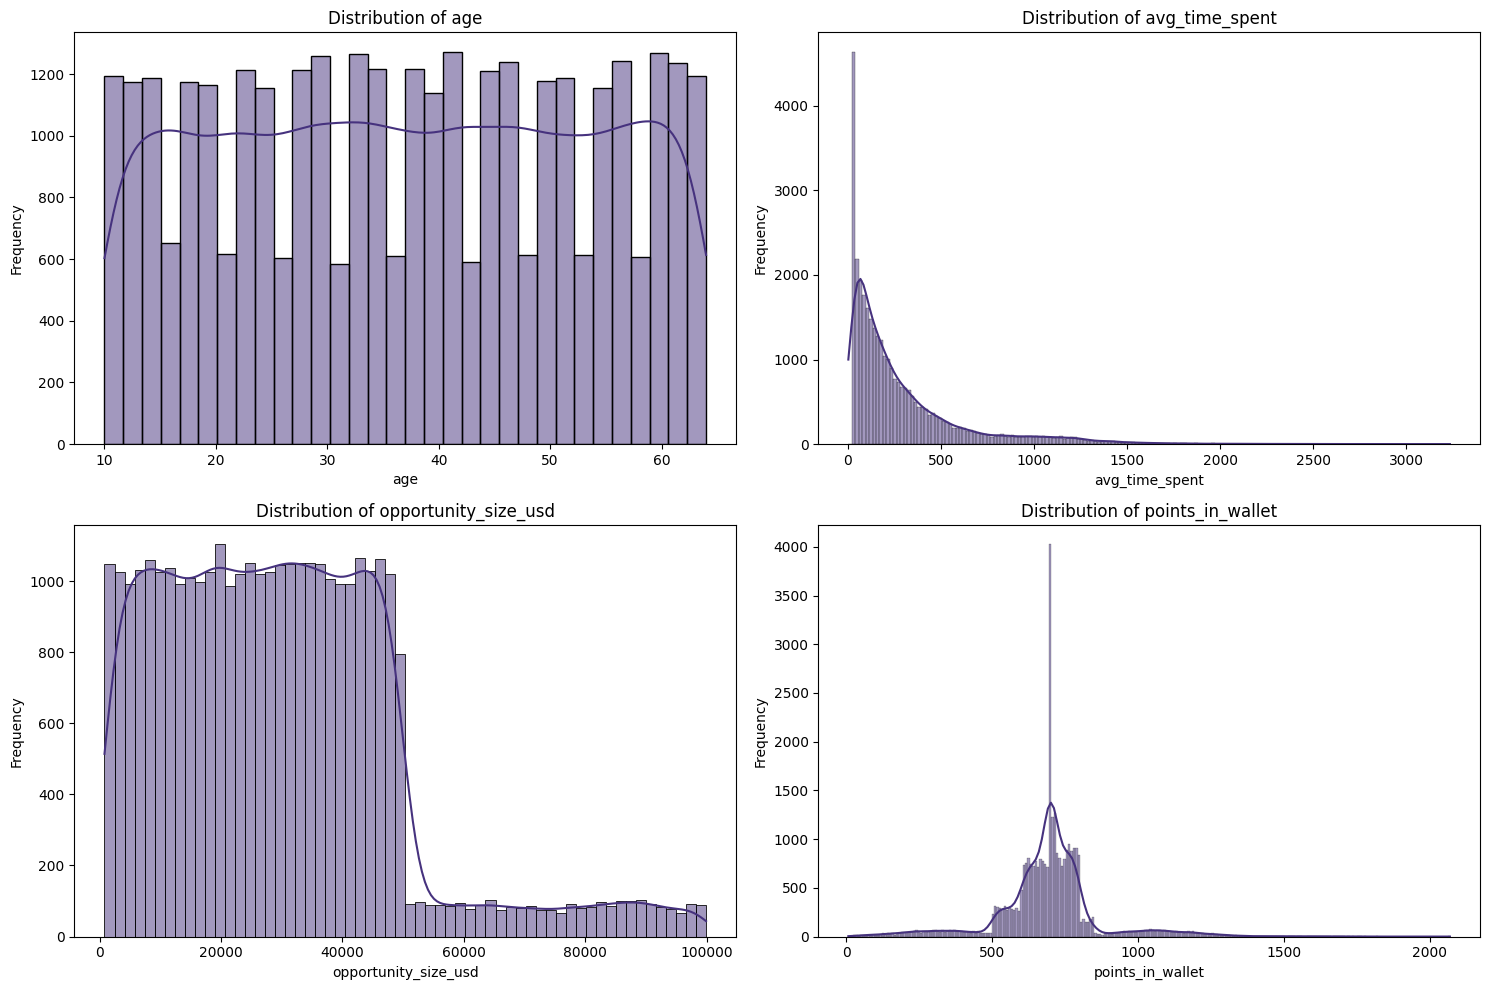

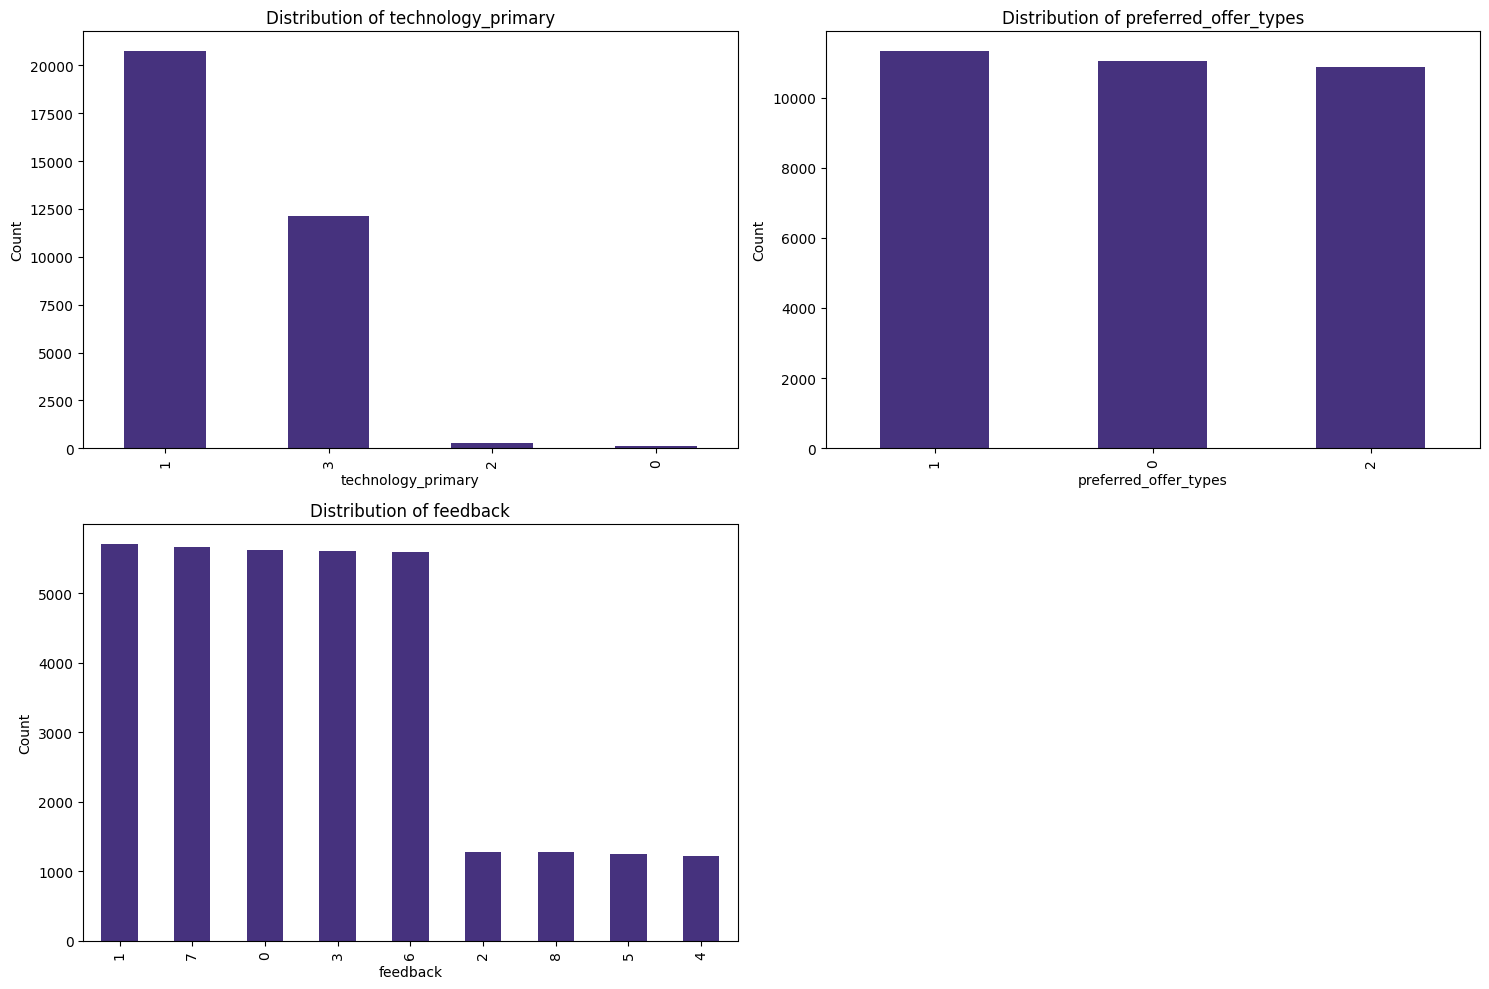

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting a color palette for the visualizations
sns.set_palette("viridis")

# Selecting a few numerical and categorical features for visualization
numerical_features = ['age', 'avg_time_spent', 'opportunity_size_usd', 'points_in_wallet']
categorical_features = ['technology_primary', 'preferred_offer_types', 'feedback']

# Creating histograms for numerical features
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(churn_data_cleaned[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Creating bar charts for categorical features
plt.figure(figsize=(15, 10))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    churn_data_cleaned[feature].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

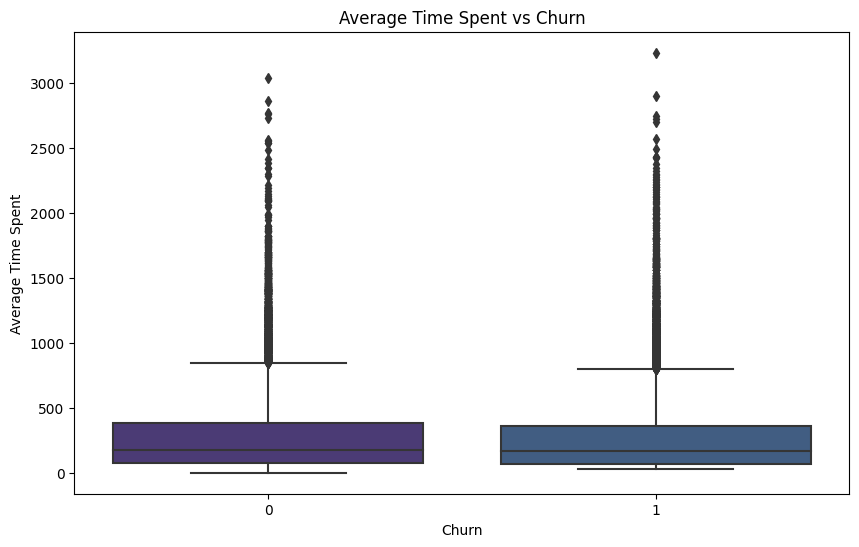

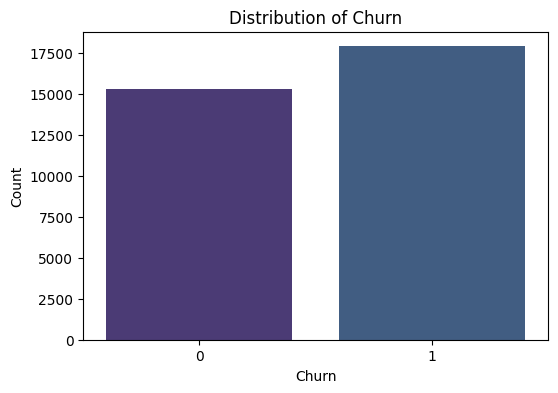

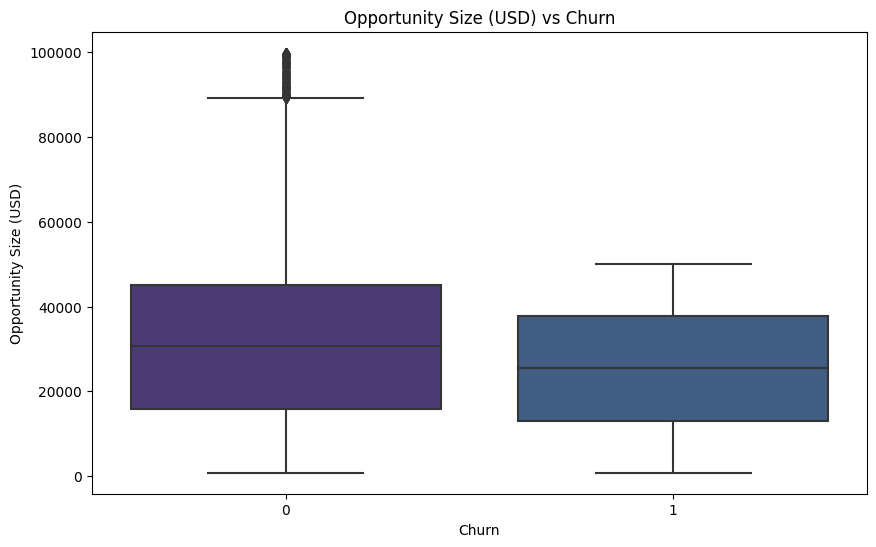

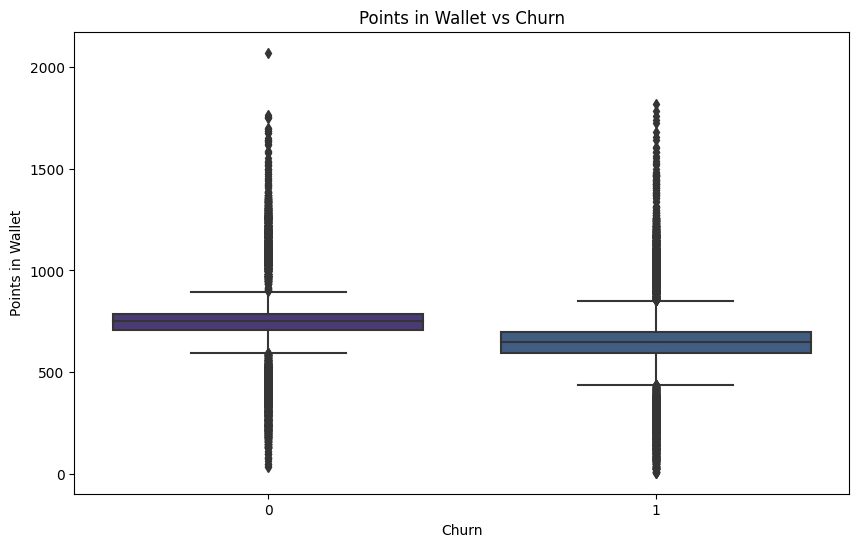

In [15]:
# Additional visualizations

# Visualization 1: Box plot for 'Average Time Spent' by 'Churn'
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='avg_time_spent', data=churn_data_cleaned)
plt.title('Average Time Spent vs Churn')
plt.xlabel('Churn')
plt.ylabel('Average Time Spent')
plt.show()

# Visualization 2: Count plot for 'Churn' distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=churn_data_cleaned)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Visualization 3: Box plot for 'Opportunity Size (USD)' by 'Churn'
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='opportunity_size_usd', data=churn_data_cleaned)
plt.title('Opportunity Size (USD) vs Churn')
plt.xlabel('Churn')
plt.ylabel('Opportunity Size (USD)')
plt.show()

# Visualization 4: Box plot for 'Points in Wallet' by 'Churn'
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='points_in_wallet', data=churn_data_cleaned)
plt.title('Points in Wallet vs Churn')
plt.xlabel('Churn')
plt.ylabel('Points in Wallet')
plt.show()

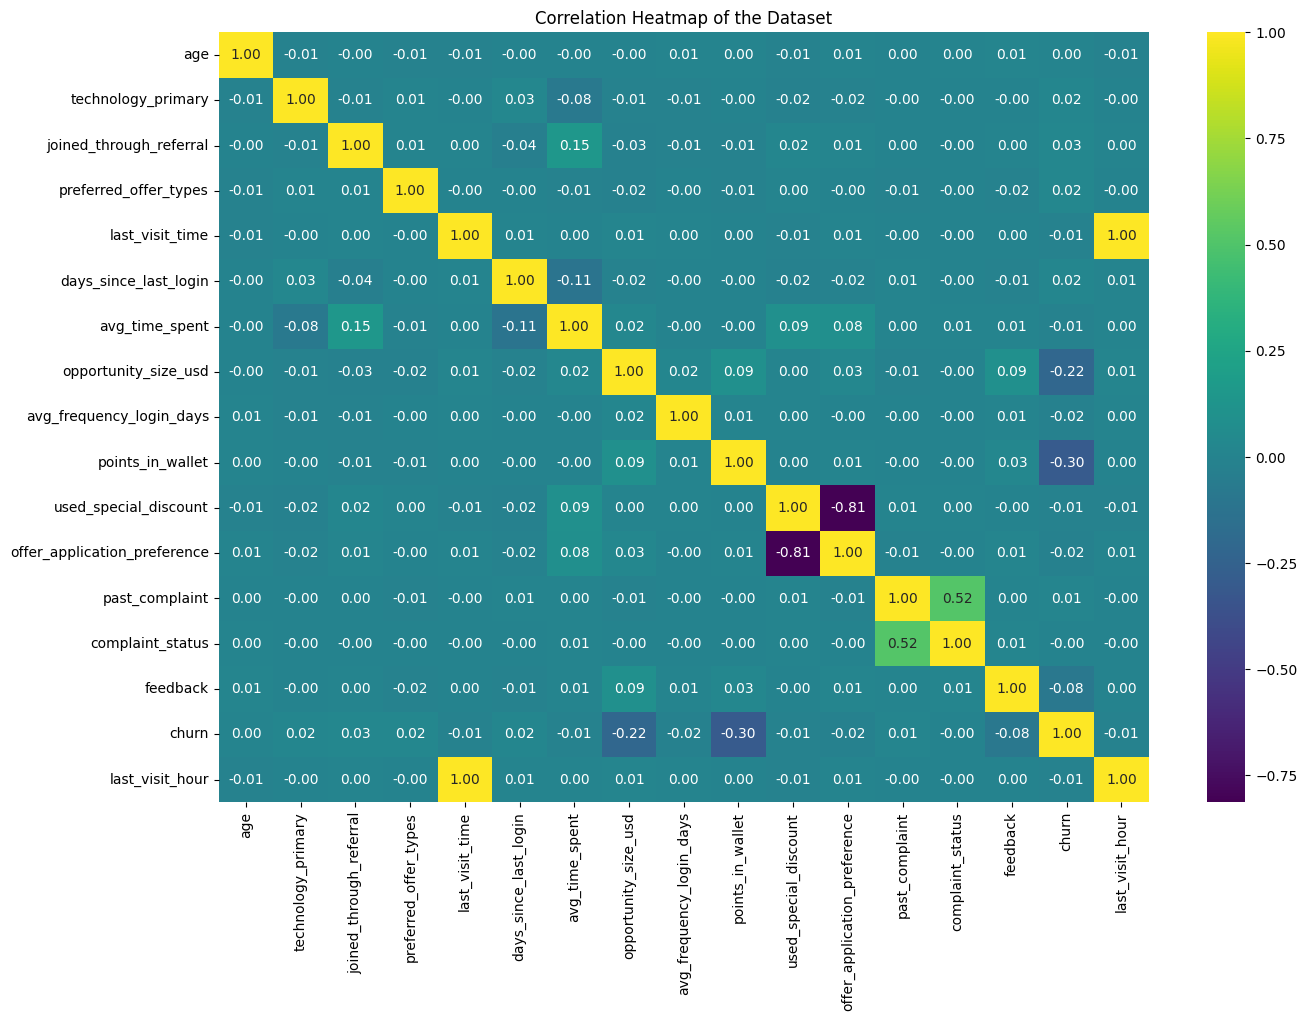

In [16]:
# Correlation Analysis
# Computing the correlation matrix
correlation_matrix = churn_data_cleaned.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis')
plt.title('Correlation Heatmap of the Dataset')
plt.show()

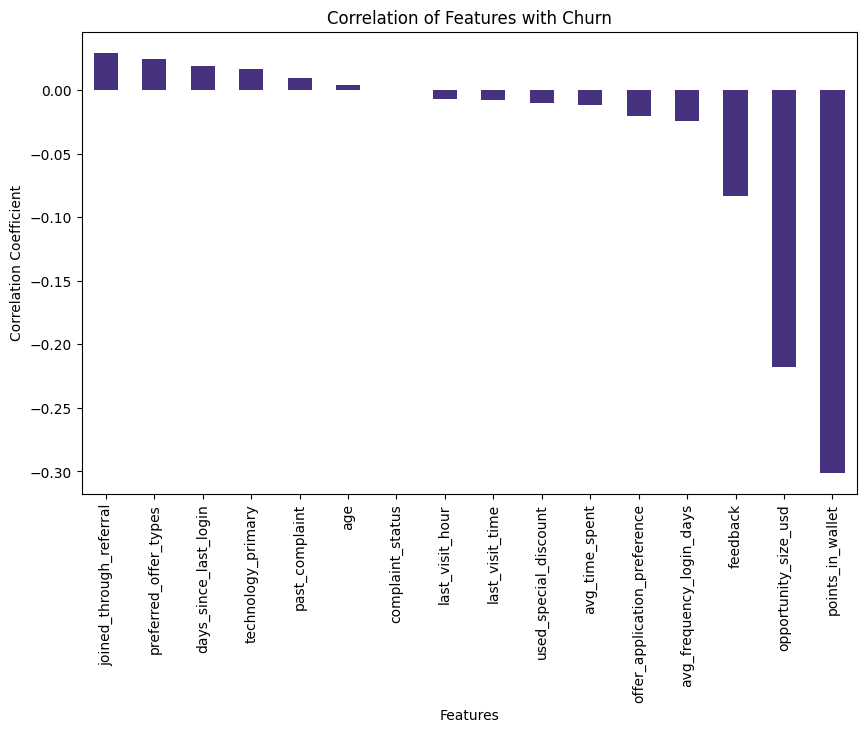

In [17]:
# Detailed Correlation Analysis
# Focusing on correlations with 'Churn' and other key features

# Extracting correlations with 'Churn'
churn_correlations = correlation_matrix['churn'].sort_values(ascending=False)

# Plotting the correlations with 'Churn'
plt.figure(figsize=(10, 6))
churn_correlations.drop('churn').plot(kind='bar')
plt.title('Correlation of Features with Churn')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Feature Selection
# Selecting features based on EDA and correlation analysis
selected_features = ['points_in_wallet', 'opportunity_size_usd', 'feedback', 
                     'joined_through_referral', 'preferred_offer_types', 'days_since_last_login',
                     'technology_primary', 'past_complaint']

# Define numerical and categorical features
numerical_features = ['points_in_wallet', 'opportunity_size_usd', 'days_since_last_login']
categorical_features = ['feedback', 'joined_through_referral', 'preferred_offer_types', 'technology_primary', 'past_complaint']

# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply the transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [19]:
# Select numerical features
numerical_featuress = churn_data_cleaned[numerical_features]

# Calculate mean and standard deviation
means = numerical_featuress.mean()
std_devs = numerical_featuress.std()

# Print or save these statistics
print("Means:\n", means)
print("Standard Deviations:\n", std_devs)

Means:
 points_in_wallet           691.311918
opportunity_size_usd     29296.812176
days_since_last_login       12.767403
dtype: float64
Standard Deviations:
 points_in_wallet           177.023856
opportunity_size_usd     19465.988542
days_since_last_login        5.567312
dtype: float64


In [20]:
# Preparing the data
X = churn_data_cleaned[numerical_features + categorical_features]
y = churn_data_cleaned['churn']

In [21]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Combine the preprocessor with the model in a pipeline
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])

# Train the model with training data
rf_model.fit(X_train, y_train)

# Make predictions with testing data
y_pred = rf_model.predict(X_test)
rf_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['points_in_wallet',
                                                   'opportunity_size_usd',
                                                   'days_since_last_login']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['feedback',
                                                   'joined_through_referral',
                                                   'preferred_offer_types',
                                                   'technology_primary',
                                                   'past_complaint'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [23]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# CatBoost model
catboost_model = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', CatBoostClassifier(random_state=42, verbose=0))])

# Train the model
catboost_model.fit(X_train, y_train)

# Make predictions
y_pred_catboost = catboost_model.predict(X_test)

# Evaluation
catboost_accuracy = accuracy_score(y_test, y_pred_catboost)
catboost_roc_auc = roc_auc_score(y_test, y_pred_catboost)
catboost_report = classification_report(y_test, y_pred_catboost)

print("CatBoost Metrics:")
print("Accuracy:", catboost_accuracy)
print("ROC-AUC Score:", catboost_roc_auc)
print("Classification Report:\n", catboost_report)

CatBoost Metrics:
Accuracy: 0.8717100315836968
ROC-AUC Score: 0.8679659844089146
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.81      0.86      3090
           1       0.85      0.92      0.88      3559

    accuracy                           0.87      6649
   macro avg       0.88      0.87      0.87      6649
weighted avg       0.87      0.87      0.87      6649



#### improving Randomforest using GridsearchCV

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Since 'rf_model' is the pipeline  previously defined
# which includes both preprocessing and the classifier

# Define the parameter grid to search
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 4],
    'classifier__min_samples_leaf': [1, 2]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid,
                           cv=3,  # 3-fold cross-validation
                           n_jobs=-1,  # Use all available cores
                           verbose=2)

In [25]:
# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['points_in_wallet',
                                                                          'opportunity_size_usd',
                                                                          'days_since_last_login']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['feedback',
                                                                          'joined_through_referral',
                                                                          'preferred_offer_types',
                                                                          'technology_primary',
                                                                          'past_complaint'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__min_samples_leaf': [1, 2],
                         'classifier__min_samples_split': [2, 4],
                         'classifier__n_estimators': [50, 100, 200]},
             verbose=2)

In [26]:
# Optional: Extract the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Display the best parameters
print("Best parameters:", best_params)

Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 4, 'classifier__n_estimators': 200}


In [27]:
# Optionally, we can use the best_model for further predictions or evaluation
y_pred_best = best_model.predict(X_test)

In [28]:
# Calculate evaluation metrics for the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)

# Display the evaluation metrics for the best model
print("Accuracy (Best Model):", accuracy_best)
print("ROC-AUC Score (Best Model):", roc_auc_best)
print("Classification Report (Best Model):\n", class_report_best)

Accuracy (Best Model): 0.8668972777861332
ROC-AUC Score (Best Model): 0.8654320920297782
Classification Report (Best Model):
               precision    recall  f1-score   support

           0       0.87      0.84      0.86      3090
           1       0.87      0.89      0.88      3559

    accuracy                           0.87      6649
   macro avg       0.87      0.87      0.87      6649
weighted avg       0.87      0.87      0.87      6649



In [29]:
# Assuming 'preprocessor' is your ColumnTransformer
X_train_transformed = preprocessor.transform(X_train)

# Convert to DataFrame for easier viewing (optional)
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=preprocessor.get_feature_names_out())

# Display the first few rows of the transformed data
print(X_train_transformed_df.head())


   num__points_in_wallet  num__opportunity_size_usd   
0               0.160547                  -1.197418  \
1              -0.462145                  -1.185998   
2              -0.819494                  -0.009356   
3              -0.286026                   0.186523   
4              -1.398114                  -0.438120   

   num__days_since_last_login  cat__feedback_0  cat__feedback_1   
0                    0.938954              1.0              0.0  \
1                   -1.041675              0.0              0.0   
2                    1.479126              0.0              0.0   
3                    1.479126              0.0              0.0   
4                    0.218725              1.0              0.0   

   cat__feedback_2  cat__feedback_3  cat__feedback_4  cat__feedback_5   
0              0.0              0.0              0.0              0.0  \
1              0.0              0.0              0.0              0.0   
2              0.0              0.0            

In [30]:
# RandomForestClassifier is part of a pipeline named 'model'
rf_classifier = rf_model.named_steps['classifier']

# Extracting feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame for easy handling
feature_names = rf_model.named_steps['preprocessor'].get_feature_names_out()
importances_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})

# Save the DataFrame for later use in the app
importances_df.to_csv('feature_importances.csv', index=False)

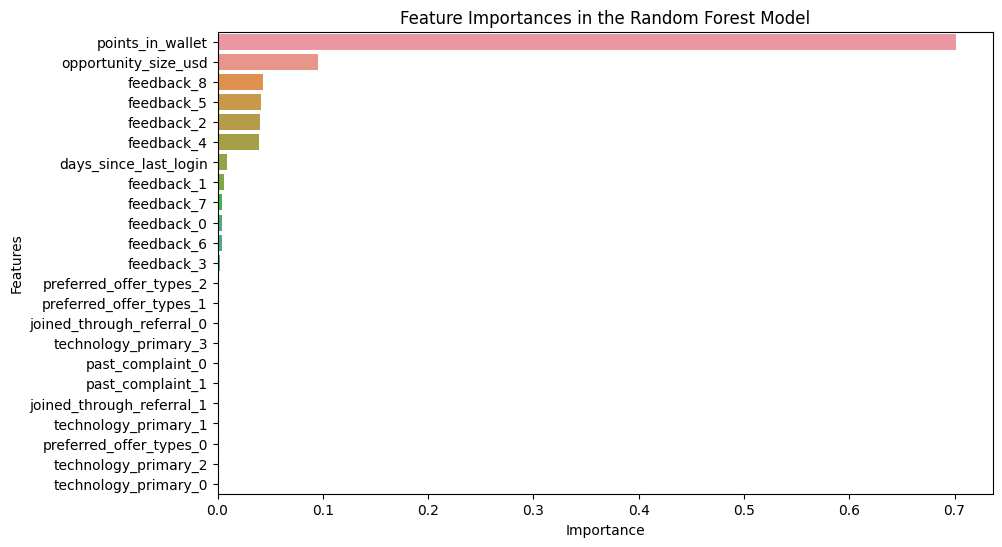

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Accessing the RandomForestClassifier inside the pipeline
rf_classifier = best_model.named_steps['classifier']

# Extracting feature importances
feature_importances = rf_classifier.feature_importances_

# Getting feature names after preprocessing
# For numerical features, the names stay the same
# For categorical features, we need to transform them using the one-hot encoder
ohe = best_model.named_steps['preprocessor'].named_transformers_['cat']
ohe_columns = ohe.get_feature_names_out(categorical_features)
feature_names = numerical_features + list(ohe_columns)

# Creating a Series for easy plotting
importances = pd.Series(feature_importances, index=feature_names)

# Sorting importances
sorted_importances = importances.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances, y=sorted_importances.index)
plt.title('Feature Importances in the Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

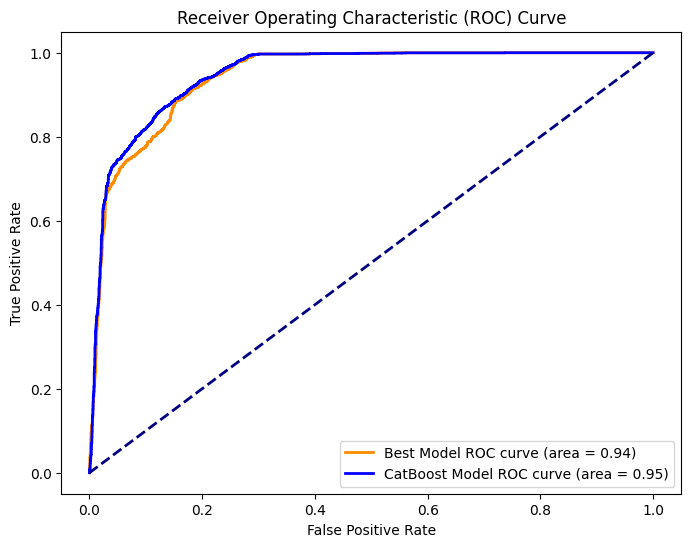

In [32]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curves and AUCs for both models
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
roc_auc_best = auc(fpr_best, tpr_best)

fpr_catboost, tpr_catboost, thresholds_catboost = roc_curve(y_test, catboost_model.predict_proba(X_test)[:, 1])
roc_auc_catboost = auc(fpr_catboost, tpr_catboost)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_best, tpr_best, color='darkorange', lw=2, label='Best Model ROC curve (area = %0.2f)' % roc_auc_best)
plt.plot(fpr_catboost, tpr_catboost, color='blue', lw=2, label='CatBoost Model ROC curve (area = %0.2f)' % roc_auc_catboost)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [33]:
import joblib

# Save the best model to a file
joblib.dump(best_model, 'random_forest_classifier.joblib')

['random_forest_classifier.joblib']

In [34]:
import joblib

# Since best_model is your trained pipeline
preprocessor = best_model.named_steps['preprocessor']

# Save the preprocessor
joblib.dump(preprocessor, 'preprocessor.joblib')

['preprocessor.joblib']